In [1]:
from lmfit import Parameters
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.signal import wiener, filtfilt, butter, gaussian, freqz
from scipy.ndimage import filters
from core.util.units import compute_dft

In [2]:
def powerfluorescence_testing():
    x = np.linspace(1, 1000, 101)
    mod, params = fitlogic.make_hyperbolicsaturation_model()
    
    print('Parameters of the model',mod.param_names,' with the independet variable',mod.independent_vars)

    p = Parameters()
    p.add('I_sat', value=200)
    p.add('slope', value=0.25)
    p.add('offset', value=2)
    p.add('P_sat', value=100)
    
    data_noisy = (mod.eval(x=x, params=p) + 10*np.random.normal(size=x.shape))

    result = fitlogic.make_hyperbolicsaturation_fit(
        x_axis=x,
        data=data_noisy,
        estimator=fitlogic.estimate_hyperbolicsaturation)

    print(result.fit_report())

    plt.plot(x, data_noisy,'-b', label='noisy data')
    plt.plot(x, mod.eval(x=x, params=params), '-g', label='original')
    plt.plot(x, mod.eval(x=x, params=result.params),'-r', label='fit result')
    plt.legend(bbox_to_anchor=(0, 1.02, 1, .102), loc=3, ncol=2, mode="expand", borderaxespad=0)
    plt.show()

    print(result.message)


Parameters of the model ['I_sat', 'P_sat', 'slope', 'offset']  with the independet variable x
[[Model]]
    (Model(hyperbolicsaturation_function) + ((Model(slope_function) * Model(linear_function)) + Model(constant_function)))
[[Fit Statistics]]
    # function evals   = 7
    # data points      = 101
    # variables        = 4
    chi-square         = nan
    reduced chi-square = nan
[[Variables]]
    I_sat:   -inf        +/- nan      (nan%) (init=-inf)
    P_sat:   -inf        +/- nan      (nan%) (init=-inf)
    slope:   -inf        +/- nan      (nan%) (init=-inf)
    offset:  -inf        +/- nan      (nan%) (init=-inf)
[[Correlations]] (unreported correlations are <  0.100)

Tolerance seems to be too small.. Could not estimate error-bars


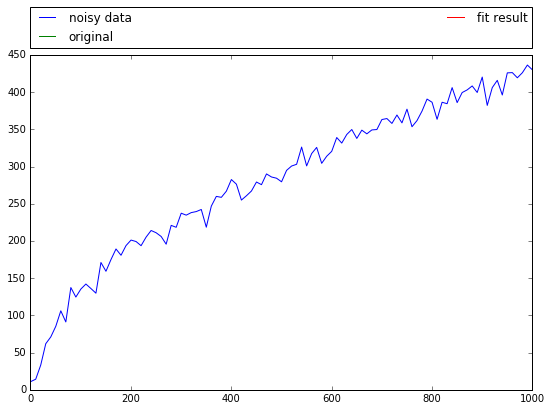

In [3]:
powerfluorescence_testing()